c:\Users\leona\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\leona\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\Users\leona\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


24
24


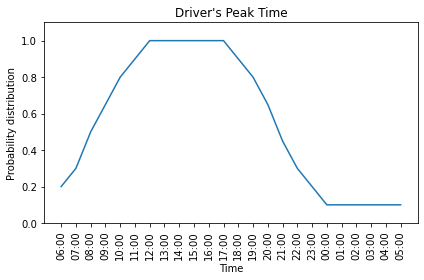

In [1]:
from model_lomba import *
import matplotlib.pyplot as plt
import seaborn as sns

demand = [0.2,0.3,0.5,0.65,0.8,0.9,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.8,0.65,0.45,0.3,0.2,0.1,0.1,0.1,0.1,0.1,0.1]
hour = ["06:00","07:00","08:00","09:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00","23:00","00:00","01:00","02:00","03:00","04:00","05:00"]
print(len(demand))
print(len(hour))

plt.plot(hour,demand)
plt.xticks(rotation = 'vertical')
plt.xlabel('Time')
plt.ylabel('Probability distribution')
plt.title("Driver's Peak Time")
#plt.axvline(x = 4, color = 'r', linestyle='--', label = 'axvline - full height')
#plt.axvline(x = 12, color = 'r', linestyle='--', label = 'axvline - full height')
plt.ylim([0.0,1.1])
plt.tight_layout()
plt.savefig('Prob-dist-ppt.png', format = 'png' )
plt.show()

Less : ratio (cp : inventory) 1:3 charging size = 6; inv size = 19 (40-45 seems like)  
Normal : ratio (cp : inventory) 1:3 charging size = 3; inv size = 9 (40-45 seems like)  
More : ratio (cp : inventory) 1:3 charging size = 2; inv size = 5 (40-45 seems like)

In [2]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50
ratio = 3

#Dalam menit
days = 14
num_of_step = days*24*60
#num_of_step = 100
temp_ = 0
n = 16
while temp_ < 45 : 
    n += 1
    print('inventory',n)
    inv_size = n
    cp_size = int(np.ceil(inv_size/ratio))
    model = switching_model(num_of_motorist=50,num_of_stations=4,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="less", demand = demand)

    for i in range(num_of_step):
        model.step()
    model_data = model.datacollector.get_model_vars_dataframe()
    temp_ = model_data["num_of_alive"].iloc[-1]
    print(temp_)

n_ = 0
while temp_ > 45:
    n_ += 1
    print('inventory',n, ' pengurangan cp', n_)
    inv_size = n
    cp_size = int(np.ceil(inv_size/ratio)) - n_
    model = switching_model(num_of_motorist=50,num_of_stations=4,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="less", demand = demand)

    for i in range(num_of_step):
        model.step()
    model_data = model.datacollector.get_model_vars_dataframe()
    temp_ = model_data["num_of_alive"].iloc[-1]
    print(temp_)


inventory 17
4
4
42
inventory 18
4
4
40
inventory 19
4
4
49
inventory 19  pengurangan cp 1
4
4
39


In [3]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50
ratio = 3

#Dalam menit
days = 14
num_of_step = days*24*60
#num_of_step = 100
temp_ = 0
n = 5
while temp_ < 45 : 
    n += 1
    print('inventory',n)
    inv_size = n
    cp_size = int(np.ceil(inv_size/ratio))
    model = switching_model(num_of_motorist=50,num_of_stations=4,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="normal", demand = demand)

    for i in range(num_of_step):
        model.step()
    model_data = model.datacollector.get_model_vars_dataframe()
    temp_ = model_data["num_of_alive"].iloc[-1]
    print(temp_)

n_ = 0
while temp_ > 45:
    n_ += 1
    print('inventory',n, ' pengurangan cp', n_)
    inv_size = n
    cp_size = int(np.ceil(inv_size/ratio)) - n_
    model = switching_model(num_of_motorist=50,num_of_stations=4,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="normal", demand = demand)

    for i in range(num_of_step):
        model.step()
    model_data = model.datacollector.get_model_vars_dataframe()
    temp_ = model_data["num_of_alive"].iloc[-1]
    print(temp_)


inventory 6
9
9
27
inventory 7
9
9
37
inventory 8
9
9
39
inventory 9
9
9
46
inventory 9  pengurangan cp 1
9
9
30


In [4]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50
ratio = 3

#Dalam menit
days = 14
num_of_step = days*24*60
#num_of_step = 100
temp_ = 0
n = 4
while temp_ < 45 : 
    n += 1
    print('inventory',n)
    inv_size = n
    cp_size = int(np.ceil(inv_size/ratio))
    model = switching_model(num_of_motorist=50,num_of_stations=4,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="more", demand = demand)

    for i in range(num_of_step):
        model.step()
    model_data = model.datacollector.get_model_vars_dataframe()
    temp_ = model_data["num_of_alive"].iloc[-1]
    print(temp_)

n_ = 0
while temp_ > 45:
    n_ += 1
    print('inventory',n, ' pengurangan cp', n_)
    inv_size = n
    cp_size = int(np.ceil(inv_size/ratio)) - n_
    model = switching_model(num_of_motorist=50,num_of_stations=4,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="more", demand = demand)

    for i in range(num_of_step):
        model.step()
    model_data = model.datacollector.get_model_vars_dataframe()
    temp_ = model_data["num_of_alive"].iloc[-1]
    print(temp_)


inventory 5
16
16
46
inventory 5  pengurangan cp 1
16
16
26


In [5]:
n_ = 0
while temp_ > 45:
    n_ += 1
    print('perkalian ratio',n, ' pengurangan cp', n_)
    inv_size = ratio*n
    cp_size = int(np.ceil(inv_size/ratio)) - n_
    model = switching_model(num_of_motorist=50,num_of_stations=4,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="more", demand = demand)

    for i in range(num_of_step):
        model.step()
    model_data = model.datacollector.get_model_vars_dataframe()
    temp_ = model_data["num_of_alive"].iloc[-1]
    print(temp_)

In [6]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50
inv_size = 19
cp_size = 6
model = switching_model(num_of_motorist=50,num_of_stations=10,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="less", demand = demand)

#Dalam menit
days = 14
num_of_step = days*24*60
#num_of_step = 100
for i in range(num_of_step):
    model.step()

4
4


In [7]:
#Ambil data agent
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data.head()

Position       Charge Alive  Full_battery  Empty_battery  \
Step AgentID                                                            
0    0           None  1256.491504  None           NaN            NaN   
     1           None  1348.232394  None           NaN            NaN   
     2           None  1696.803127  None           NaN            NaN   
     3           None  2361.529418  None           NaN            NaN   
     4           None   339.800682  None           NaN            NaN   

              CP_full  CP_empty  
Step AgentID                     
0    0            NaN       NaN  
     1            NaN       NaN  
     2            NaN       NaN  
     3            NaN       NaN  
     4            NaN       NaN

In [8]:
motorist_alive = agent_data.xs(num_of_step-1,level = "Step")["Alive"]
motorist_id = []
for motor in model.motorists:
    motorist_id.append(motor.unique_id)
motorist_alive[motorist_id]

AgentID
150     True
151     True
152     True
153     True
154     True
155     True
156     True
157    False
158     True
159     True
160    False
161     True
162     True
163     True
164     True
165     True
166     True
167     True
168     True
169     True
170     True
171     True
172    False
173     True
174    False
175     True
176     True
177    False
178     True
179    False
180     True
181    False
182    False
183     True
184     True
185     True
186     True
187     True
188    False
189     True
190     True
191     True
192    False
193     True
194     True
195     True
196     True
197     True
198    False
199     True
Name: Alive, dtype: object

In [9]:
agent_pos = agent_data.xs(0,level = "Step")["Position"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_pos = agent_pos[station_id]
print(station_pos)

AgentID
200    (11, 11)
201    (11, 36)
202    (36, 11)
203    (36, 36)
Name: Position, dtype: object


In [10]:
step_station = num_of_step-1
#step_station = 0
agent_full = agent_data.xs(step_station,level = "Step")["Full_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_full = agent_full[station_id]
print(station_full)

AgentID
200    19.0
201    19.0
202    19.0
203    19.0
Name: Full_battery, dtype: float64


In [11]:
agent_empty = agent_data.xs(step_station,level = "Step")["Empty_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_empty = agent_empty[station_id]
print(station_empty)

AgentID
200    0.0
201    0.0
202    0.0
203    0.0
Name: Empty_battery, dtype: float64


In [12]:
agent_cp_full = agent_data.xs(step_station,level = "Step")["CP_full"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_cp_full = agent_cp_full[station_id]
print(station_cp_full)

AgentID
200    6.0
201    6.0
202    5.0
203    3.0
Name: CP_full, dtype: float64


In [13]:
agent_cp_empty = agent_data.xs(step_station,level = "Step")["CP_empty"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_cp_empty = agent_cp_empty[station_id]
print(station_cp_empty)

AgentID
200    0.0
201    0.0
202    1.0
203    3.0
Name: CP_empty, dtype: float64


In [14]:
#Ambil data motorist
driver_num = 0
motorist_pos = agent_data.xs(model.motorists[driver_num].unique_id, level = "AgentID")["Position"]
motorist_pos.head()
motorist_pos.tail()

Step
20155    (10, 38)
20156    (10, 38)
20157    (10, 38)
20158    (10, 38)
20159    (10, 38)
Name: Position, dtype: object

Text(0, 0.5, 'y')

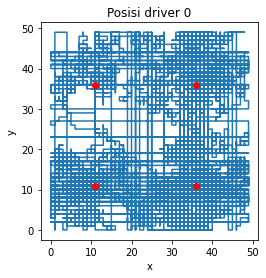

In [15]:
#Coba plot posisi
x_coor = []
y_coor = []
for coor in motorist_pos:
    x_coor.append(coor[0])
    y_coor.append(coor[1])



plt.plot(x_coor,y_coor)
for i in range(model.num_of_stations):
    plt.plot(model.stations[i].pos[0],model.stations[i].pos[1],color = "red", marker = 'o')
plt.xlim([0,map_width])
plt.ylim([0,map_height])
plt.title('Posisi driver ' + str(driver_num))
plt.axis('scaled')
plt.xlabel('x')
plt.ylabel('y')

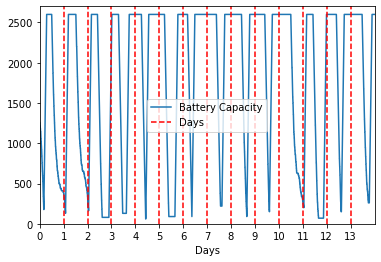

In [16]:
#Cek baterai
battery_id = 8
battery_energy = agent_data.xs(battery_id, level = "AgentID")["Charge"]
battery_energy.plot()
plt.xlim(0,num_of_step)
plt.ylim(0,2700)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Battery Capacity','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Example of Battery Charge Cycle')
plt.show()

In [17]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data.tail()

,num_of_alive,num_of_charging
20155,39,3
20156,39,3
20157,39,3
20158,39,3
20159,39,4


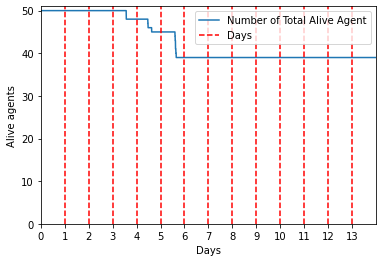

In [18]:
plt.plot(model_data["num_of_alive"])
plt.ylim([0,num_of_motorist + 1])
plt.ylabel("Alive agents")
plt.xlabel("Steps")
plt.xlim(0,num_of_step)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Number of Total Alive Agent','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Number of Total Alive Agent')
plt.show()

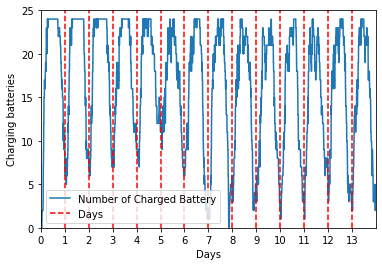

In [19]:
plt.plot(model_data["num_of_charging"])
plt.ylim([0,model.num_of_stations*model.cp_size +1])
plt.ylabel("Charging batteries")
plt.xlabel("Steps")
plt.xlim(0,num_of_step)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Number of Charged Battery','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Number of Total Alive Agent')
plt.show()

In [20]:
#dapetin semua motor
motorist_id = []
for mot in model.motorists:
    motorist_id.append(mot.unique_id)

#ID motor pertama dan terakhir
first_motor = min(motorist_id)
last_motor = max(motorist_id)

#Ambil data motor doang
motorist_data = agent_data.loc[(agent_data.index.get_level_values('AgentID')>=first_motor) & (agent_data.index.get_level_values('AgentID') <=last_motor)]


motorist_alive_position = motorist_data.loc[motorist_data['Alive'] == True]["Position"]
motorist_alive_position.tail()

#print jumlah baris
print(len(motorist_alive_position.index))

864665


In [21]:
array_alive_positions = motorist_alive_position.tolist()
print(len(array_alive_positions))

864665


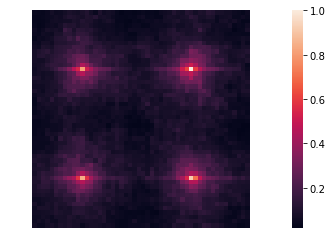

In [22]:
heatmap_data = np.zeros((model.grid.width, model.grid.height))
for coor in array_alive_positions:
    x,y = coor
    heatmap_data[x,y] +=1

most_frequent = np.amax(heatmap_data)
norm_heatmap_data = heatmap_data/most_frequent

ax = sns.heatmap(norm_heatmap_data)
ax.invert_yaxis()
plt.axis('equal')
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.tick_params(left = False, bottom = False)
#ax.set_xlabel('x')
#ax.set_ylabel('y')   

# Heat_map

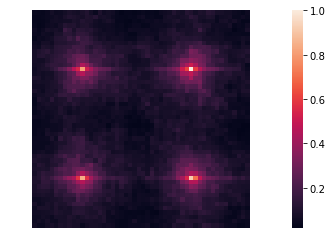

In [23]:
heatmap_data = np.zeros((model.grid.width, model.grid.height))
for coor in array_alive_positions:
    x,y = coor
    heatmap_data[x,y] +=1

most_frequent = np.amax(heatmap_data)
norm_heatmap_data = heatmap_data/most_frequent

ax = sns.heatmap(norm_heatmap_data)
ax.invert_yaxis()
plt.axis('equal')
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.tick_params(left = False, bottom = False)
#ax.set_xlabel('x')
#ax.set_ylabel('y')   

# Boxplot

In [24]:
sengaja-error

NameError: name 'sengaja' is not defined

In [ ]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50
ratio = 3 
inv_size = [24, 12 , 8]
cp_size = [6 , 3, 2]
config_ = ['less','normal','more']
days = 14
num_of_step = days*24*60
#num_of_step = 100
df_ = {
    'moore' : [],
    'num_alive' : [[],[],[]]
}

for i in range(len(config_)):
    df_['moore'].append(config_[i])
    for j in range(10):
        model = switching_model(num_of_motorist=50,num_of_stations=10,
        inv_size=inv_size[i],
        cp_size= cp_size[i],
        width=map_width,height=map_height,moore=moore, configuration=config_[i], demand = demand)

        for k in range(num_of_step):
            model.step()
            
        model_data = model.datacollector.get_model_vars_dataframe()
        df_['num_alive'][i].append(model_data["num_of_alive"].iloc[-1])

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16


In [ ]:
import pandas as pd 
box_t = pd.DataFrame(columns = config_)
for i in range(len(config_)):
    box_t[config_[i]] = df_['num_alive'][i]

In [ ]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50
ratio = 3 
inv_size = [19, 9 , 5]
cp_size = [6 , 3, 2]
config_ = ['less','normal','more']
days = 14
num_of_step = days*24*60
#num_of_step = 100
df_ = {
    'moore' : [],
    'num_alive' : [[],[],[]]
}

for i in range(len(config_)):
    df_['moore'].append(config_[i])
    for j in range(10):
        model = switching_model(num_of_motorist=50,num_of_stations=10,
        inv_size=inv_size[i],
        cp_size= cp_size[i],
        width=map_width,height=map_height,moore=moore, configuration=config_[i], demand = demand)

        for k in range(num_of_step):
            model.step()
            
        model_data = model.datacollector.get_model_vars_dataframe()
        df_['num_alive'][i].append(model_data["num_of_alive"].iloc[-1])

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16


In [ ]:
import pandas as pd 
box_ = pd.DataFrame(columns = config_)
for i in range(len(config_)):
    box_[config_[i]] = df_['num_alive'][i]

In [ ]:
cpr = pd.DataFrame(columns = ['less 19', 'less 24', 'normal 9', 'normal 12', 'more 5', 'more 8'])
cpr['less 19']=box_['less']
cpr['less 24']=box_t['less']
cpr['normal 9']=box_['normal']
cpr['normal 12']=box_t['normal']
cpr['more 5']=box_['more']
cpr['more 8'] =box_t['more']
cpr

,less 19,less 24,normal 9,normal 12,more 5,more 8
0,39,47,45,50,49,50
1,44,45,46,49,44,50
2,44,41,47,49,48,50
3,47,45,42,47,45,50
4,44,50,43,48,39,50
5,39,49,43,47,44,50
6,46,46,45,49,48,50
7,35,50,41,46,46,50
8,43,49,39,49,43,50
9,40,38,39,46,42,50


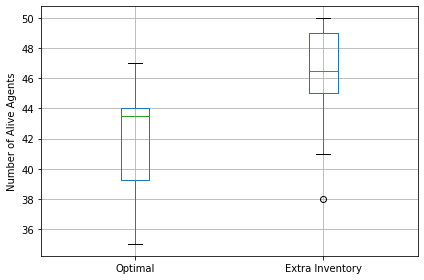

In [ ]:
cpr[['less 19', 'less 24']].boxplot()
plt.xticks([1, 2],['Optimal', 'Extra Inventory'])
plt.ylabel('Number of Alive Agents')
plt.tight_layout()
plt.savefig('box-plot L 19 24.png', format = 'png' )

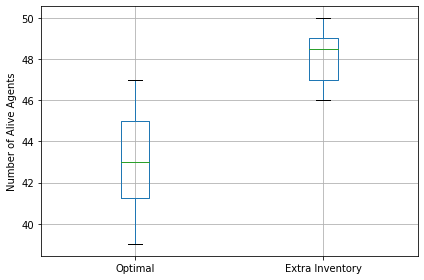

In [ ]:
cpr[['normal 9', 'normal 12']].boxplot()
plt.xticks([1, 2],['Optimal', 'Extra Inventory'])
plt.ylabel('Number of Alive Agents')
plt.tight_layout()
plt.savefig('box-plot n 9 12.png', format = 'png' )

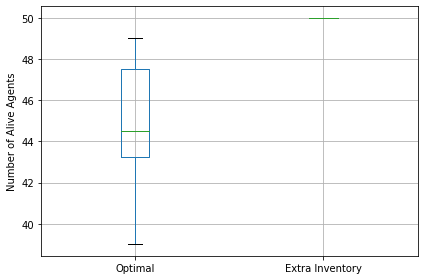

In [ ]:
cpr[['more 5', 'more 8']].boxplot()
plt.xticks([1, 2],['Optimal', 'Extra Inventory'])
plt.ylabel('Number of Alive Agents')
plt.tight_layout()
plt.savefig('box-plot more 5-8.png', format = 'png' )

In [ ]:
inv_size = [24, 12 , 8]
cp_size = [6 , 3, 2]

<AxesSubplot:>

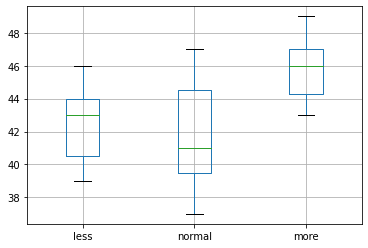

In [ ]:
box_.boxplot()

In [ ]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50
ratio = 3 
inv_size = [19, 9 , 5]
cp_size = [6 , 3, 2]
config_ = [4,9,16]
days = 14
num_of_step = days*24*60
#num_of_step = 100
df_ = {
    'moore' : [],
    'num_alive' : [[],[],[]]
}

for i in range(len(config_)):
    df_['moore'].append(config_[i])
    for j in range(10):
        model = switching_model(num_of_motorist=50,num_of_stations=config_[i],
        inv_size=inv_size[i],
        cp_size= cp_size[i],
        width=map_width,height=map_height,moore=moore, configuration="random", demand = demand)

        for k in range(num_of_step):
            model.step()
            
        model_data = model.datacollector.get_model_vars_dataframe()
        df_['num_alive'][i].append(model_data["num_of_alive"].iloc[-1])

4
4
4
4
4
4
4
4
4
4
9
9
9
9
9
9
9
9
9
9
16
16
16
16
16
16
16
16
16
16


In [ ]:
box_r = pd.DataFrame(columns = config_)
for i in range(len(config_)):
    box_r[config_[i]] = df_['num_alive'][i]

<AxesSubplot:>

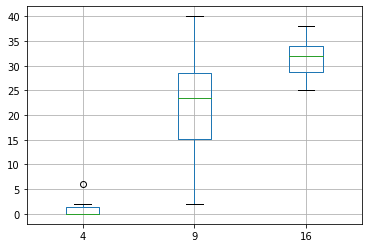

In [ ]:
box_r.boxplot()

<AxesSubplot:>

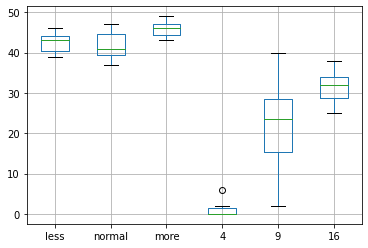

In [ ]:
all_b = pd.concat([box_, box_r], axis=1)
all_b.boxplot()

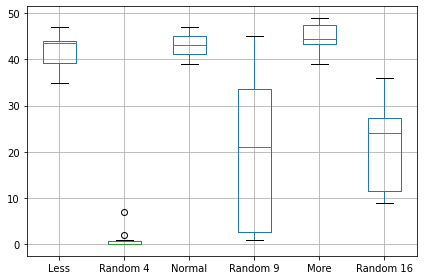

In [ ]:
all_ = pd.DataFrame(columns = ['Less', 'Random 4', 'Normal', 'Random 9','More', 'Random 16'])
all_['Less'] = box_['less']
all_['Normal'] = box_['normal']
all_['More'] = box_['more']
all_['Random 4'] = box_r[4]
all_['Random 9'] = box_r[9]
all_['Random 16'] = box_r[16]
all_.boxplot()
plt.tight_layout()
plt.savefig('box-plot.png', format = 'png' )

In [ ]:
all_

,Less,Random 4,Normal,Random 9,More,Random 16
0,39,0,45,31,49,16
1,44,0,46,11,44,25
2,44,0,47,37,48,36
3,47,1,42,34,45,25
4,44,2,43,1,39,9
5,39,0,43,1,44,10
6,46,0,45,32,48,23
7,35,7,41,2,46,31
8,43,0,39,5,43,10
9,40,0,39,45,42,28


In [ ]:
all_.mean()

Less         42.1
Random 4      1.0
Normal       43.0
Random 9     19.9
More         44.8
Random 16    21.3
dtype: float64

In [ ]:
all_.var()

Less          13.877778
Random 4       4.888889
Normal         7.777778
Random 9     302.988889
More           9.511111
Random 16     91.122222
dtype: float64

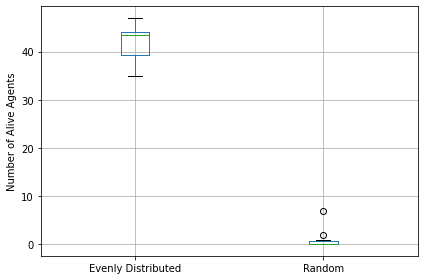

In [ ]:
all_[['Less', 'Random 4']].boxplot()
plt.xticks([1, 2],['Evenly Distributed', 'Random'])
plt.ylabel('Number of Alive Agents')
plt.tight_layout()
plt.savefig('box-plot L4.png', format = 'png' )

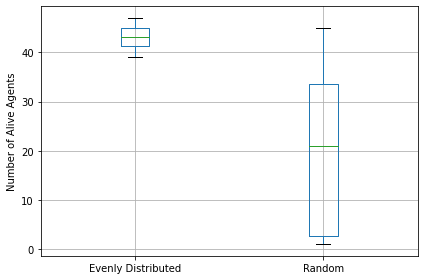

In [ ]:
all_[['Normal', 'Random 9']].boxplot()
plt.xticks([1, 2],['Evenly Distributed', 'Random'])
plt.ylabel('Number of Alive Agents')
plt.tight_layout()
plt.savefig('box-plot N9.png', format = 'png' )

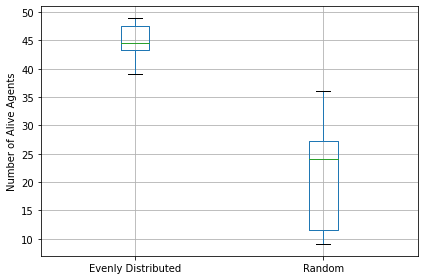

In [ ]:
all_[['More', 'Random 16']].boxplot()
plt.xticks([1, 2],['Evenly Distributed', 'Random'])
plt.ylabel('Number of Alive Agents')
plt.tight_layout()
plt.savefig('box-plot M16.png', format = 'png' )

In [ ]:
plt.tight_layout()
plt.savefig('box-plot 4916.png', format = 'png' )

No inventory  
Less 17   
Normal 9  
More 5

In [ ]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50
ratio = 3

#Dalam menit
days = 14
num_of_step = days*24*60
#num_of_step = 100
temp_ = 0
n = 0
while temp_ < 45 : 
    n += 1
    print('charging',n)
    inv_size = 0
    cp_size = n
    model = switching_model(num_of_motorist=50,num_of_stations=4,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="less", demand = demand)

    for i in range(num_of_step):
        model.step()
    model_data = model.datacollector.get_model_vars_dataframe()
    temp_ = model_data["num_of_alive"].iloc[-1]
    print(temp_)

charging 1
4
4
1
charging 2
4
4
2
charging 3
4
4
3
charging 4
4
4
7
charging 5
4
4
10
charging 6
4
4
12
charging 7
4
4
16
charging 8
4
4
19
charging 9
4
4
19
charging 10
4
4
27
charging 11
4
4
33
charging 12
4
4
34
charging 13
4
4
33
charging 14
4
4
42
charging 15
4
4
44
charging 16
4
4
44
charging 17
4
4
48


In [ ]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50
ratio = 3

#Dalam menit
days = 14
num_of_step = days*24*60
#num_of_step = 100
temp_ = 0
n = 0
while temp_ < 45 : 
    n += 1
    print('charging',n)
    inv_size = 0
    cp_size = n
    model = switching_model(num_of_motorist=50,num_of_stations=4,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="normal", demand = demand)

    for i in range(num_of_step):
        model.step()
    model_data = model.datacollector.get_model_vars_dataframe()
    temp_ = model_data["num_of_alive"].iloc[-1]
    print(temp_)

charging 1
9
9
2
charging 2
9
9
6
charging 3
9
9
11
charging 4
9
9
17
charging 5
9
9
27
charging 6
9
9
30
charging 7
9
9
37
charging 8
9
9
42
charging 9
9
9
47


In [ ]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50
ratio = 3

#Dalam menit
days = 14
num_of_step = days*24*60
#num_of_step = 100
temp_ = 0
n = 0
while temp_ < 45 : 
    n += 1
    print('charging',n)
    inv_size = 0
    cp_size = n
    model = switching_model(num_of_motorist=50,num_of_stations=4,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="more", demand = demand)

    for i in range(num_of_step):
        model.step()
    model_data = model.datacollector.get_model_vars_dataframe()
    temp_ = model_data["num_of_alive"].iloc[-1]
    print(temp_)

charging 1
16
16
3
charging 2
16
16
11
charging 3
16
16
23
charging 4
16
16
36
charging 5
16
16
47


In [ ]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50
ratio = 3 
cp_size = [17 , 9, 5]
config_ = ['less','normal','more']
days = 14
num_of_step = days*24*60
#num_of_step = 100
df_ = {
    'moore' : [],
    'num_alive' : [[],[],[]]
}

for i in range(len(config_)):
    df_['moore'].append(config_[i])
    for j in range(10):
        model = switching_model(num_of_motorist=50,num_of_stations=10,
        inv_size=0,
        cp_size= cp_size[i],
        width=map_width,height=map_height,moore=moore, configuration=config_[i], demand = demand)

        for k in range(num_of_step):
            model.step()
            
        model_data = model.datacollector.get_model_vars_dataframe()
        df_['num_alive'][i].append(model_data["num_of_alive"].iloc[-1])

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16


In [ ]:
df_['num_alive'][2][10:]

[44, 48, 47, 43, 46, 46, 43, 43, 45, 47]

In [ ]:
df_['num_alive'][2][0:10]

[46, 47, 39, 45, 43, 42, 46, 46, 46, 44]

In [ ]:
for j in range(10):
    model = switching_model(num_of_motorist=50,num_of_stations=10,
    inv_size=0,
    cp_size= 5,
    width=map_width,height=map_height,moore=moore, configuration='more', demand = demand)

    for k in range(num_of_step):
        model.step()
        
    model_data = model.datacollector.get_model_vars_dataframe()
    df_['num_alive'][2].append(model_data["num_of_alive"].iloc[-1])

16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16


In [ ]:
df_[
    'num_alive'
][2] = []

In [ ]:
bbox_ = pd.DataFrame(columns = config_)
for i in range(len(config_)):
    bbox_[config_[i]] = df_['num_alive'][i]

ValueError: Length of values (20) does not match length of index (10)

<AxesSubplot:>

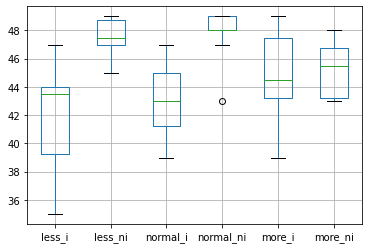

In [ ]:
invvv_ = pd.DataFrame(columns = ['less_i', 'less_ni', 'normal_i', 'normal_ni','more_i', 'more_ni'])
invvv_['less_i'] = box_['less']
invvv_['less_ni'] =bbox_['less']
invvv_['normal_i'] = box_['normal']
invvv_['normal_ni'] =  bbox_['normal']
invvv_['more_i'] =  box_['more']
invvv_['more_ni'] = df_['num_alive'][2][10:]
invvv_.boxplot()

In [ ]:
invvv_

,less_i,less_ni,normal_i,normal_ni,more_i,more_ni
0,39,49,45,43,49,44
1,44,47,46,49,44,48
2,44,49,47,49,48,47
3,47,45,42,48,45,43
4,44,47,43,48,39,46
5,39,48,43,47,44,46
6,46,47,45,49,48,43
7,35,48,41,48,46,43
8,43,46,39,48,43,45
9,40,49,39,49,42,47


In [ ]:
invvv_.mean()

less_i       42.1
less_ni      47.5
normal_i     43.0
normal_ni    47.8
more_i       44.8
more_ni      45.2
dtype: float64

In [ ]:
invvv_.var()

less_i       13.877778
less_ni       1.833333
normal_i      7.777778
normal_ni     3.288889
more_i        9.511111
more_ni       3.511111
dtype: float64

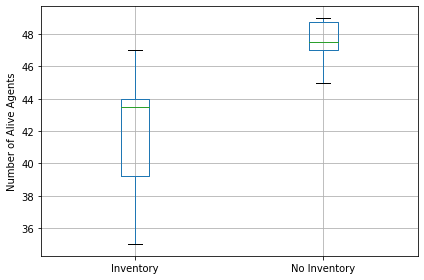

In [ ]:
invvv_[['less_i', 'less_ni']].boxplot()
plt.xticks([1, 2],['Inventory', 'No Inventory'])
plt.ylabel('Number of Alive Agents')
plt.tight_layout()
plt.savefig('box-plot ini 4.png', format = 'png' )

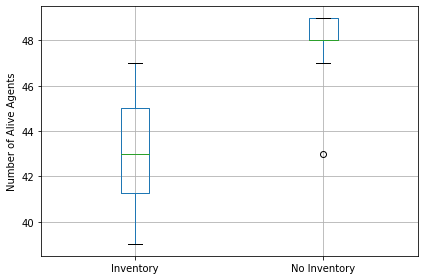

In [ ]:
invvv_[['normal_i', 'normal_ni']].boxplot()
plt.xticks([1, 2],['Inventory', 'No Inventory'])
plt.ylabel('Number of Alive Agents')
plt.tight_layout()
plt.savefig('box-plot ini 9.png', format = 'png' )

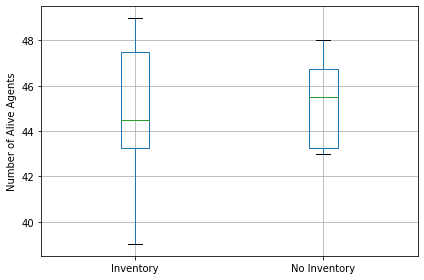

In [ ]:
invvv_[['more_i', 'more_ni']].boxplot()
plt.xticks([1, 2],['Inventory', 'No Inventory'])
plt.ylabel('Number of Alive Agents')
plt.tight_layout()
plt.savefig('box-plot ini 16.png', format = 'png' )

In [ ]:
model = switching_model(num_of_motorist=50,num_of_stations=10,
    inv_size=19,
    cp_size= 6,
    width=map_width,height=map_height,moore=moore, configuration='less', demand = demand)

for k in range(num_of_step):
    model.step()
    
model_data = model.datacollector.get_model_vars_dataframe()


4
4


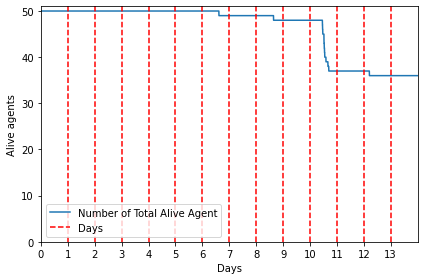

In [ ]:
plt.plot(model_data["num_of_alive"])
plt.ylim([0,num_of_motorist + 1])
plt.ylabel("Alive agents")
plt.xlabel("Steps")
plt.xlim(0,num_of_step)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Number of Total Alive Agent','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Number of Total Alive Agent')
plt.tight_layout()
plt.savefig('line-plot less inventory.png', format = 'png' )
plt.show()

In [ ]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50
ratio = 3 
inv_size = [19, 0, 9, 0 , 5, 0]
cp_size = [6, 17, 3, 9, 2, 5]
config_ = ['less', 'less','normal','normal','more','more']
days = 14
num_of_step = days*24*60
#num_of_step = 100
df_ = {
    'moore' : [],
    'num_of_charging' : [[],[],[],[],[],[]]
}

for i in range(len(config_)):
    df_['moore'].append(config_[i]+str(inv_size[i]))
    model = switching_model(num_of_motorist=50,num_of_stations=10,
    inv_size=inv_size[i],
    cp_size= cp_size[i],
    width=map_width,height=map_height,moore=moore, configuration=config_[i], demand = demand)

    for k in range(num_of_step):
        model.step()
        
    model_data = model.datacollector.get_model_vars_dataframe()
    df_['num_of_charging'][i] = model_data["num_of_charging"]

4
4
4
4
9
9
9
9
16
16
16
16


In [ ]:
df_['moore']

['less19', 'less0', 'normal9', 'normal0', 'more5', 'more0']

In [ ]:
import pandas as pd

In [ ]:
crg = pd.DataFrame(columns = df_['moore'])
for i in range(len(df_['num_of_charging'])):
    crg[crg.columns[i]]= df_['num_of_charging'][i]


In [ ]:
crg

,less19,less0,normal9,normal0,more5,more0
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
20155,3,2,2,2,5,2
20156,3,2,2,3,5,2
20157,3,2,2,3,5,2
20158,3,2,2,3,5,2


In [ ]:
20160/2

10080.0

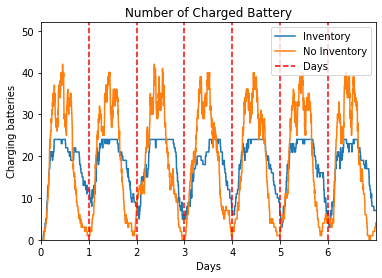

In [ ]:
plt.plot(crg.index[:10080], crg[crg.columns[0]][:10080])
plt.plot(crg.index[:10080], crg[crg.columns[1]][:10080])
plt.ylim([0,10+max(max(crg[crg.columns[1]]), max(crg[crg.columns[0]]))])
plt.ylabel("Charging batteries")
plt.xlabel("Steps")
plt.xlim(0,10080)
for i in range(1,int(days*0.5)):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Inventory', 'No Inventory','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, 0.5*days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(7)*1440, np.arange(0,7))  # Set text labels.
plt.xlabel('Days')
#plt.title('Number of Total Alive Agent')
#plt.tight_layout()
plt.title('Number of Charged Battery')
plt.savefig('line-plot ini 16.png', format = 'png' )
plt.show()

In [ ]:
import numpy as np 
import pandas as pd
coordinates = []
height = 50
width = 50
configuration = 'more'
if configuration == "less":
    #4 titik
    coordinates.append((np.floor(width*(1/4)).astype(int)-1, np.floor(height*(1/4)).astype(int)-1))
    coordinates.append((np.floor(width*(1/4)).astype(int)-1, np.floor(height*(3/4)).astype(int)-1))
    coordinates.append((np.floor(width*(3/4)).astype(int)-1, np.floor(height*(1/4)).astype(int)-1))
    coordinates.append((np.floor(width*(3/4)).astype(int)-1, np.floor(height*(3/4)).astype(int)-1))
    #TODO: remove the print comments, that is just for testing
    print(len(coordinates))

elif configuration == "normal":
    #9 titik
    coordinates.append((np.floor(width*(1/6)).astype(int)-1, np.floor(height*(1/6)).astype(int)-1))
    coordinates.append((np.floor(width*(1/6)).astype(int)-1, np.floor(height*(3/6)).astype(int)-1))
    coordinates.append((np.floor(width*(1/6)).astype(int)-1, np.floor(height*(5/6)).astype(int)-1))
    coordinates.append((np.floor(width*(3/6)).astype(int)-1, np.floor(height*(1/6)).astype(int)-1))
    coordinates.append((np.floor(width*(3/6)).astype(int)-1, np.floor(height*(3/6)).astype(int)-1))
    coordinates.append((np.floor(width*(3/6)).astype(int)-1, np.floor(height*(5/6)).astype(int)-1))
    coordinates.append((np.floor(width*(5/6)).astype(int)-1, np.floor(height*(1/6)).astype(int)-1))
    coordinates.append((np.floor(width*(5/6)).astype(int)-1, np.floor(height*(3/6)).astype(int)-1))
    coordinates.append((np.floor(width*(5/6)).astype(int)-1, np.floor(height*(5/6)).astype(int)-1))

    
    print(len(coordinates))

elif configuration == "more":
    coordinates.append((np.floor(width*(1/8)).astype(int)-1, np.floor(height*(1/8)).astype(int)-1))
    coordinates.append((np.floor(width*(1/8)).astype(int)-1, np.floor(height*(3/8)).astype(int)-1))
    coordinates.append((np.floor(width*(1/8)).astype(int)-1, np.floor(height*(5/8)).astype(int)-1))
    coordinates.append((np.floor(width*(1/8)).astype(int)-1, np.floor(height*(7/8)).astype(int)-1))
    coordinates.append((np.floor(width*(3/8)).astype(int)-1, np.floor(height*(1/8)).astype(int)-1))
    coordinates.append((np.floor(width*(3/8)).astype(int)-1, np.floor(height*(3/8)).astype(int)-1))
    coordinates.append((np.floor(width*(3/8)).astype(int)-1, np.floor(height*(5/8)).astype(int)-1))
    coordinates.append((np.floor(width*(3/8)).astype(int)-1, np.floor(height*(7/8)).astype(int)-1))
    coordinates.append((np.floor(width*(5/8)).astype(int)-1, np.floor(height*(1/8)).astype(int)-1))
    coordinates.append((np.floor(width*(5/8)).astype(int)-1, np.floor(height*(3/8)).astype(int)-1))
    coordinates.append((np.floor(width*(5/8)).astype(int)-1, np.floor(height*(5/8)).astype(int)-1))
    coordinates.append((np.floor(width*(5/8)).astype(int)-1, np.floor(height*(7/8)).astype(int)-1))
    coordinates.append((np.floor(width*(7/8)).astype(int)-1, np.floor(height*(1/8)).astype(int)-1))
    coordinates.append((np.floor(width*(7/8)).astype(int)-1, np.floor(height*(3/8)).astype(int)-1))
    coordinates.append((np.floor(width*(7/8)).astype(int)-1, np.floor(height*(5/8)).astype(int)-1))
    coordinates.append((np.floor(width*(7/8)).astype(int)-1, np.floor(height*(7/8)).astype(int)-1))

(0.0, 50.0, 0.0, 50.0)

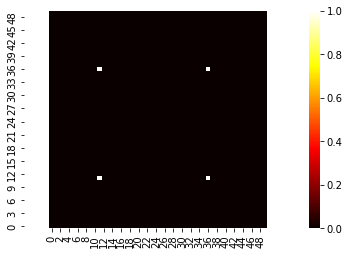

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
heatmap_data = np.zeros((width, height))
for coor in coordinates:
    x,y = coor
    heatmap_data[x,y] +=1

ax = sns.heatmap(heatmap_data,cmap="hot")
ax.invert_yaxis()
plt.axis('equal')

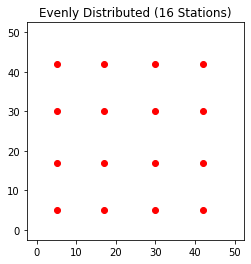

In [ ]:
map = pd.DataFrame(columns = ['x','y'])
white = map.copy()
map['x'] =  [coordinates[i][0]for i in range(len(coordinates))]#.append([0 ,0, 50,50])
map['y'] =  [coordinates[i][1]for i in range(len(coordinates))]#.append([0,50,0,50])
white['x'] =  [0 ,0, 50,50]
white['y'] =  [0,50,0,50]
major_ticks = np.arange(0, 50, 1)
minor_ticks = np.arange(0, 50, 1)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#ax.set_xticks(major_ticks)
#ax.set_xticks(minor_ticks, minor=True)
#ax.set_yticks(major_ticks)
#ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
plt.scatter(x= map.x, y = map.y,color = "red", marker = 'o')
plt.scatter(x= white.x, y = white.y,color = "white", marker = 'o')
plt.title('Evenly Distributed (16 Stations)')

#plt.xlim([0,50])
#plt.ylim([0,50])
plt.axis('scaled')
#plt.xlabel('')
#plt.ylabel('')
#ax.xaxis.set_visible(True)
#ax.yaxis.set_visible(True)
#plt.grid(which = 'both')
plt.savefig('moree.png', format = 'png' )
plt.show()


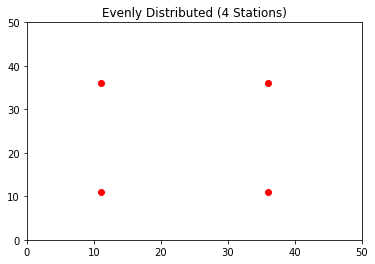

In [ ]:
map = pd.DataFrame(columns = ['x','y'])
map['x'] =  [coordinates[i][0]for i in range(len(coordinates))]
map['y'] =  [coordinates[i][1]for i in range(len(coordinates))]
major_ticks = np.arange(0, 50, 1)
minor_ticks = np.arange(0, 50, 1)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#ax.set_xticks(major_ticks)
#ax.set_xticks(minor_ticks, minor=True)
#ax.set_yticks(major_ticks)
#ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
plt.scatter(x= map.x, y = map.y,color = "red", marker = 'o')
plt.title('Evenly Distributed (4 Stations)')

plt.xlim([0,50])
plt.ylim([0,50])
#plt.axis('scaled')

#ax.xaxis.set_visible(True)
#ax.yaxis.set_visible(True)
#plt.grid(which = 'both')
plt.show()
